1. Les colonnes de données brutes (Similaires à Kaggle)

survived : L'indicateur de survie (0 = Mort, 1 = Survécu). 


pclass : La classe du passager (1, 2, 3). 


sex : Le sexe (male, female). 


age : L'âge du passager (contient des valeurs nulles). 


sibsp : Nombre de frères, sœurs ou conjoints à bord. 


parch : Nombre de parents ou enfants à bord. 


fare : Le prix du ticket. 


embarked : Le port d'embarquement (C, Q, S). 

2. Les colonnes spécifiques à Seaborn (Les "Doublons")
C'est ici que ça diffère. Seaborn ajoute des versions "lisibles" pour les graphiques :

class : Identique à pclass mais en texte (First, Second, Third). Pratique pour les légendes. 

who : Une classification plus fine que le sexe (man, woman, child). Un enfant est défini par age < 16. 


adult_male : Un booléen (True/False) indiquant si le passager est un homme adulte. 

deck : La lettre du pont de la cabine (A, B, C, D, E, F, G). Attention : cette colonne est remplie de valeurs manquantes (NaN). 


embark_town : Le nom complet du port (Cherbourg, Queenstown, Southampton). 


alive : Version texte de survived (yes, no). 


alone : Un booléen qui indique si le passager voyageait sans famille (sibsp + parch == 0)

In [197]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Option 1 : Régression (Prix du billet)
df_titanic = sns.load_dataset('titanic')


In [198]:
df_titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [199]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [200]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


https://github.com/ResidentMario/missingno

<Axes: >

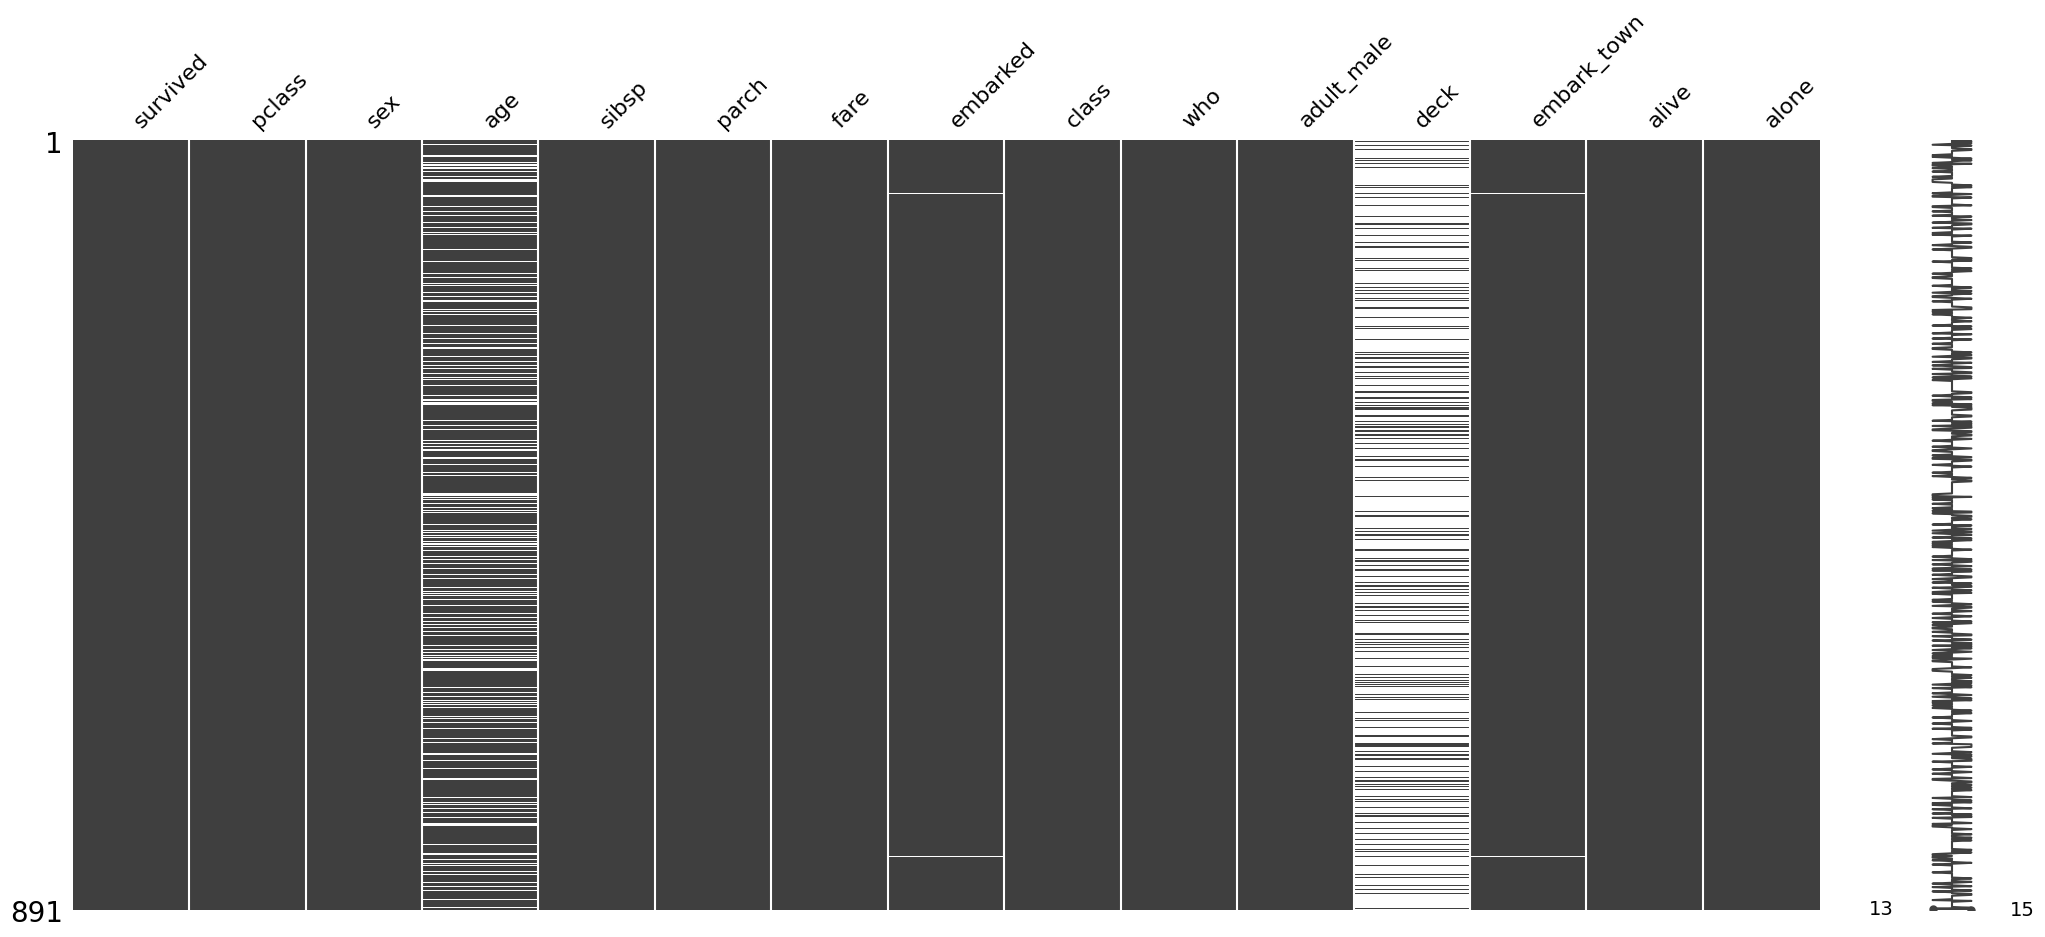

In [201]:
import missingno as msno

msno.matrix(df_titanic)

Text(0.5, 1.0, 'age')

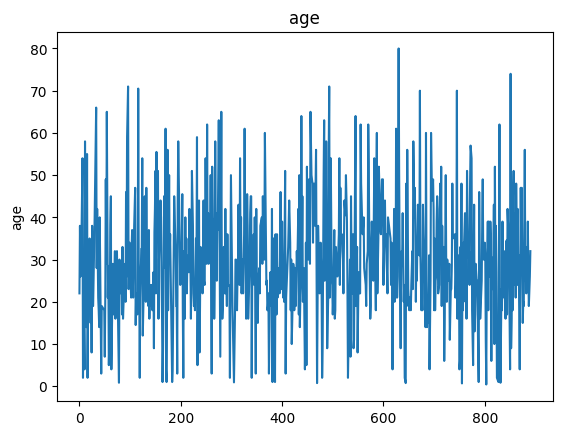

In [202]:
sns.lineplot(data=df_titanic.age)
plt.title('age')

<Axes: xlabel='age', ylabel='Count'>

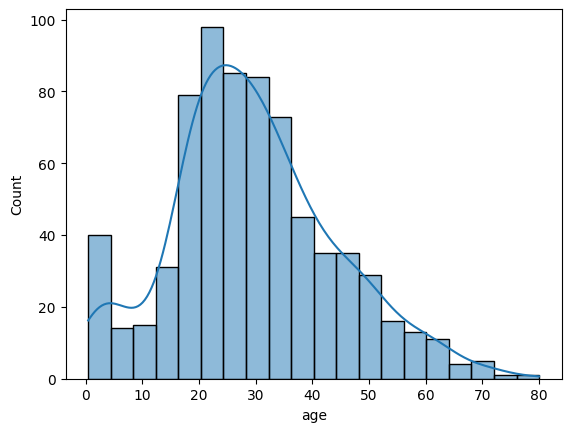

In [203]:
# L'histogramme pour voir la répartition
sns.histplot(data=df_titanic, x="age", bins=20, kde=True)

In [204]:
df_titanic_age = df_titanic.age
df_titanic_age = df_titanic_age.dropna()
age = df_titanic_age.values

age_p = age[age<10]
age_p

array([2.  , 4.  , 2.  , 8.  , 3.  , 7.  , 5.  , 4.  , 0.83, 2.  , 9.  ,
       1.  , 9.  , 4.  , 1.  , 9.  , 1.  , 4.  , 3.  , 2.  , 5.  , 8.  ,
       3.  , 7.  , 2.  , 0.92, 2.  , 3.  , 3.  , 1.  , 1.  , 3.  , 4.  ,
       5.  , 0.75, 2.  , 9.  , 9.  , 2.  , 7.  , 9.  , 8.  , 4.  , 9.  ,
       2.  , 0.75, 4.  , 6.  , 4.  , 6.  , 0.67, 5.  , 8.  , 1.  , 0.42,
       6.  , 2.  , 1.  , 0.83, 4.  , 9.  , 4.  ])

In [205]:
import numpy as np
age[age != np.round(age)]

array([28.5 ,  0.83, 14.5 , 70.5 , 32.5 , 32.5 , 36.5 , 55.5 , 40.5 ,
       45.5 , 20.5 , 23.5 ,  0.92, 45.5 ,  0.75, 40.5 ,  0.75, 24.5 ,
       28.5 ,  0.67, 30.5 ,  0.42, 30.5 ,  0.83, 34.5 ])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

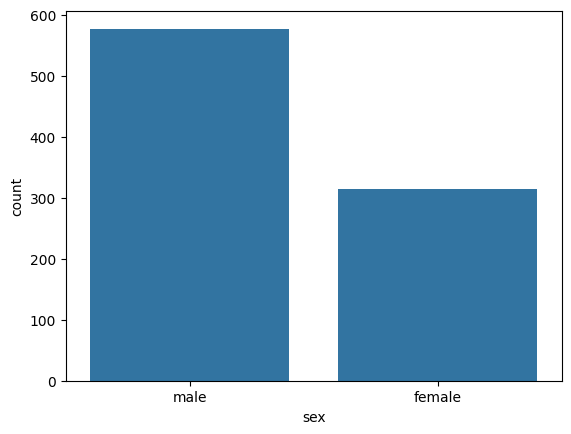

In [206]:
# Combien de passagers dans chaque classe ?
sns.countplot(data=df_titanic, x="sex")
df_titanic.sex

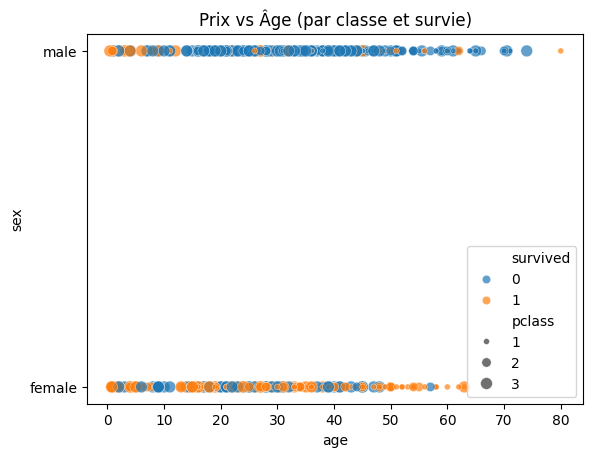

In [207]:
# Relation entre l'âge et le prix, coloré par survie
sns.scatterplot(data=df_titanic, x="age", y="sex", hue="survived", size="pclass", alpha=0.7)
plt.title("Prix vs Âge (par classe et survie)")
plt.show()

<Axes: xlabel='sex', ylabel='age'>

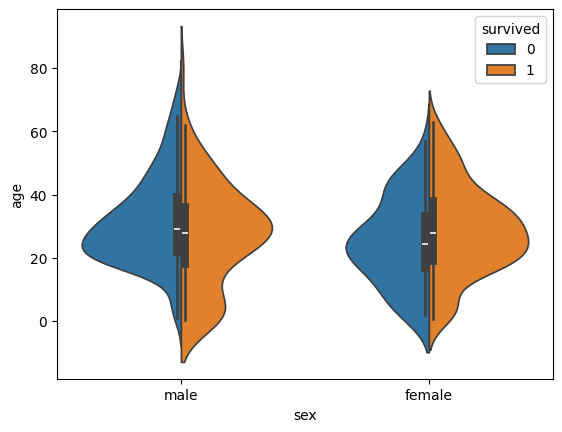

In [208]:
# Violinplot Displays distribution of data 
# across all levels of a category.
sns.violinplot(x ="sex", y ="age", hue ="survived", 
data = df_titanic, split = True)

<Axes: xlabel='class', ylabel='pclass'>

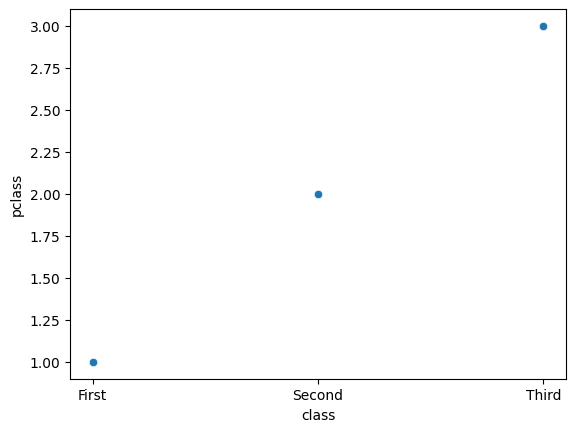

In [209]:
sns.scatterplot(data=df_titanic, x="class", y="pclass")

In [210]:
df_titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<Axes: xlabel='age', ylabel='sex'>

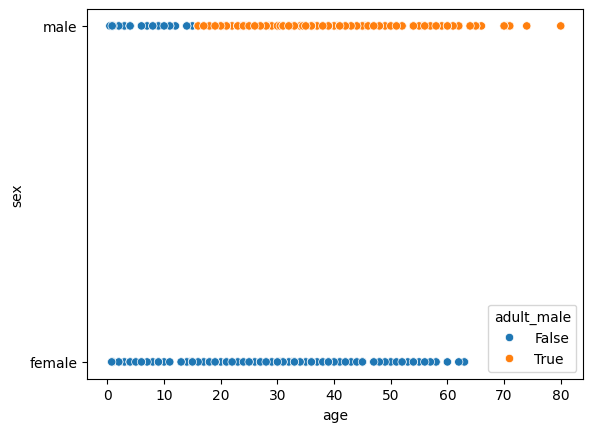

In [211]:
sns.scatterplot(data=df_titanic, x="age", y="sex", hue="adult_male")

<Axes: xlabel='who', ylabel='sex'>

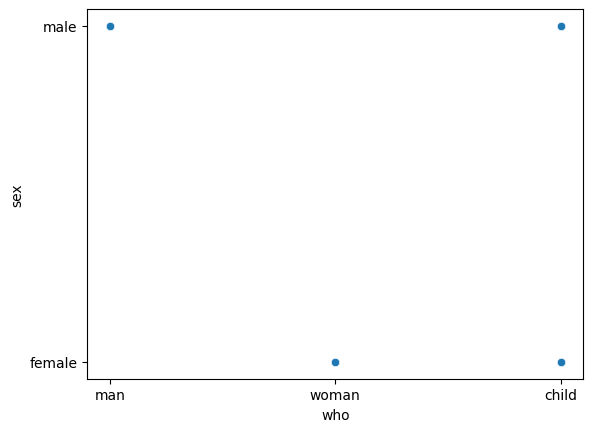

In [212]:
sns.scatterplot(data=df_titanic, x="who", y="sex", )

In [213]:
df2 = df_titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'deck']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 57.0+ KB


In [214]:
# Transformer 'sex' : male -> 0, female -> 1
df2['sex'] = df2['sex'].map({'male': 0, 'female': 1})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    int64   
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 57.0+ KB


C:\Users\anton\AppData\Local\Temp\ipykernel_32260\1375882185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sex'] = df2['sex'].map({'male': 0, 'female': 1})


In [215]:
df_titanic.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [216]:
df_titanic.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [217]:
# Supprimer la colonne 'deck'
df2 = df2.drop(columns=['deck'])


In [218]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [219]:
# La méthode la plus courte et la plus utilisée
print(df2.isnull().sum())

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64


In [220]:
# On supprime uniquement les lignes où 'embarked' est nul
df2 = df2.dropna(subset=['embarked'])

In [221]:
# On transforme 'embarked' en colonnes 0 et 1
df2 = pd.get_dummies(df2, columns=['embarked'], prefix='port')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    int64  
 3   age       712 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   port_C    889 non-null    bool   
 8   port_Q    889 non-null    bool   
 9   port_S    889 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 58.2 KB


age : 
* Supprimer
* Moyenne/Médiane
* Par groupe (pclass)

In [222]:
df_a = df2.dropna(subset=['age'])

In [223]:
df_b = df2
df_b['age'] = df2['age'].fillna(df2['age'].median())

In [224]:
df_c = df2
df_c['age'] = df2['age'].fillna(df2.groupby('pclass')['age'].transform('median'))

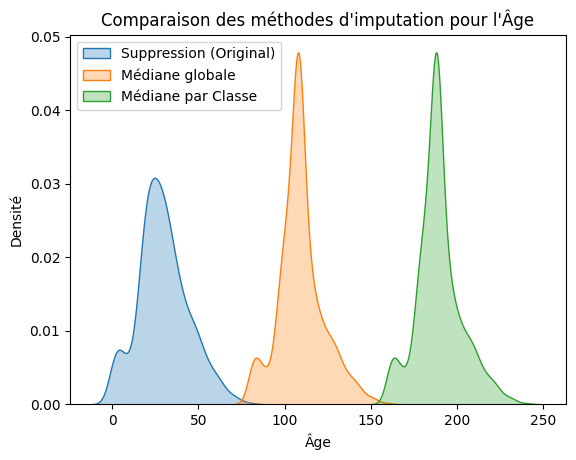

In [225]:
# On superpose les 3 courbes
sns.kdeplot(df_a['age'], label='Suppression (Original)', fill=True, alpha=0.3)
sns.kdeplot(df_b['age']+80, label='Médiane globale', fill=True, alpha=0.3)
sns.kdeplot(df_c['age']+160, label='Médiane par Classe', fill=True, alpha=0.3)

# Personnalisation
plt.title("Comparaison des méthodes d'imputation pour l'Âge")
plt.xlabel("Âge")
plt.ylabel("Densité")
plt.legend() # Crucial pour savoir quelle couleur est quoi
plt.show()

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Liste de tes DataFrames pour la boucle
datasets = [("Suppression", df_a), ("Médiane Globale", df_b), ("Par Classe", df_c)]
models_storage = {}

for name, df_temp in datasets:
    # 1. Séparation X (features) et y (cible)
    X = df_temp.drop(columns=['survived'])
    y = df_temp['survived']
    
    # 2. Split Train/Test (80% entraînement, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 3. Création et Entraînement du modèle
    model = LogisticRegression(max_iter=1000) # max_iter pour éviter les erreurs de convergence
    model.fit(X_train, y_train)
    
    # 4. Prédiction et Score
    score = model.score(X_test, y_test)

    # 5. On sauvegarde le modèle ET les noms des colonnes (important pour le plot)
    models_storage[name] = {
        'model': model,
        'features': X.columns.tolist(),
        'score': model.score(X_test, y_test)
    }

    print(f"Modèle {name} : Précision (Accuracy) = {score:.2%}")

Modèle Suppression : Précision (Accuracy) = 79.72%
Modèle Médiane Globale : Précision (Accuracy) = 78.09%
Modèle Par Classe : Précision (Accuracy) = 78.09%


In [227]:
def plot_feature_importance(model_name):
    data = models_storage[model_name]
    model = data['model']
    features = data['features']
    
    # Extraction des coefficients
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': model.coef_[0]
    }).sort_values(by='Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title(f"Feature Importance - Modèle: {model_name}")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_32260\311580315.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


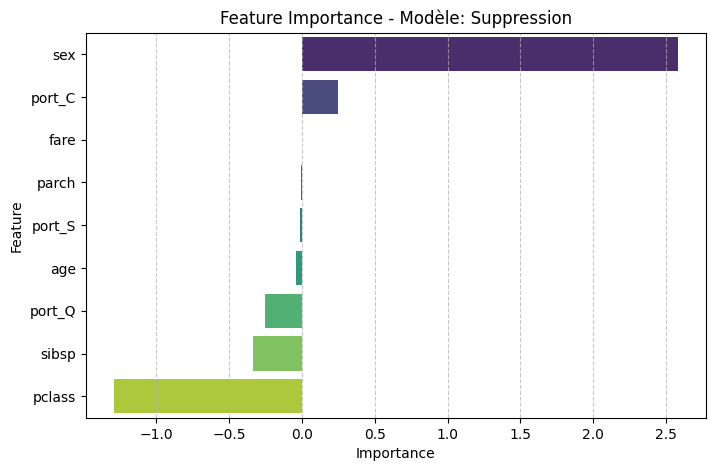

In [228]:
# Exemple d'appel
plot_feature_importance("Suppression")


C:\Users\anton\AppData\Local\Temp\ipykernel_32260\311580315.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


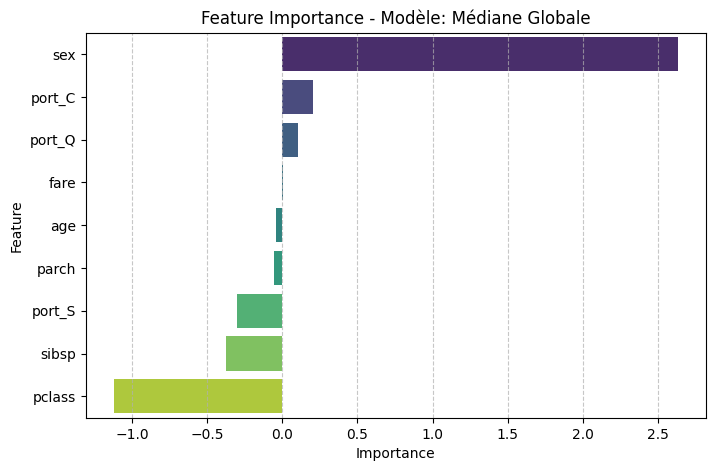

In [229]:

plot_feature_importance("Médiane Globale")


C:\Users\anton\AppData\Local\Temp\ipykernel_32260\311580315.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


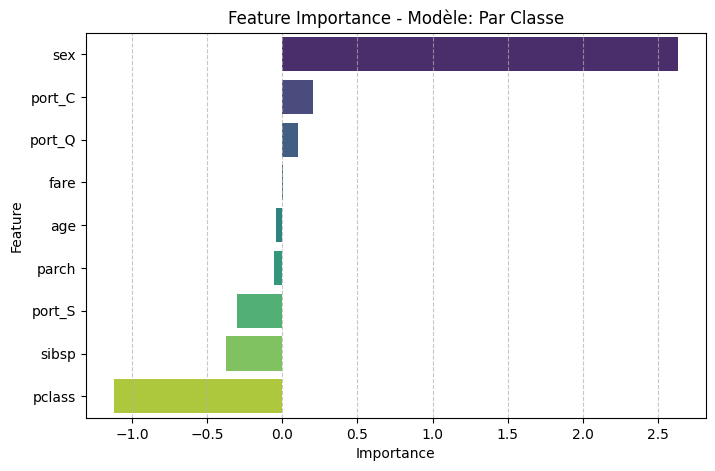

In [230]:

plot_feature_importance("Par Classe")

In [231]:
print(df_a.columns.tolist())
print(model.coef_[0])

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'port_C', 'port_Q', 'port_S']
[-1.12096904e+00  2.63156972e+00 -4.32428955e-02 -3.74728238e-01
 -5.32818988e-02  1.70071207e-03  2.04340592e-01  1.01025591e-01
 -3.00310165e-01]


Plus la valeur est éloignée de 0, plus la variable a d'influence.

Signe Positif (+) : La variable augmente les chances de survie.

Signe Négatif (-) : La variable diminue les chances de survie.

pclass-1.12Très Négatif. Plus la classe augmente ($1 \rightarrow 2 \rightarrow 3$), plus les chances de survie chutent lourdement. Les 1ères classes étaient prioritaires.

sex	+2.63	Énormément Positif. C'est ta variable la plus forte. Comme tu as mis Femme=1, cela signifie que les femmes avaient des chances de survie massivement supérieures.

# POURQUOI ? On a oublié quelque chose? ?? oui la standardisation des données !!!! age de 10 en 10 alors que sex 0 ou 1 !! 

In [232]:
from sklearn.preprocessing import StandardScaler

# On définit les colonnes numériques uniquement
num_features = ['age', 'fare', 'sibsp', 'parch']

scaler = StandardScaler()



# Les colonnes 'sex', 'port_C', etc. restent des 0 et des 1 !

In [233]:
# Liste de tes DataFrames pour la boucle
datasets = [("Suppression", df_a), ("Médiane Globale", df_b), ("Par Classe", df_c)]
models_storage = {}

for name, df_temp in datasets:
    # 1. Séparation X (features) et y (cible)
    X = df_temp.drop(columns=['survived'])
    y = df_temp['survived']
    
    # 2. Split Train/Test (80% entraînement, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # On ne scale que ces colonnes
    X_train[num_features] = scaler.fit_transform(X_train[num_features])
    X_test[num_features] = scaler.transform(X_test[num_features])
    
    # 3. Création et Entraînement du modèle
    model = LogisticRegression(max_iter=1000) # max_iter pour éviter les erreurs de convergence
    model.fit(X_train, y_train)
    
    # 4. Prédiction et Score
    score = model.score(X_test, y_test)

    # 5. On sauvegarde le modèle ET les noms des colonnes (important pour le plot)
    models_storage[name] = {
        'model': model,
        'features': X.columns.tolist(),
        'score': model.score(X_test, y_test)
    }

    print(f"Modèle {name} : Précision (Accuracy) = {score:.2%}")

Modèle Suppression : Précision (Accuracy) = 79.72%
Modèle Médiane Globale : Précision (Accuracy) = 78.09%
Modèle Par Classe : Précision (Accuracy) = 78.09%


C:\Users\anton\AppData\Local\Temp\ipykernel_32260\311580315.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


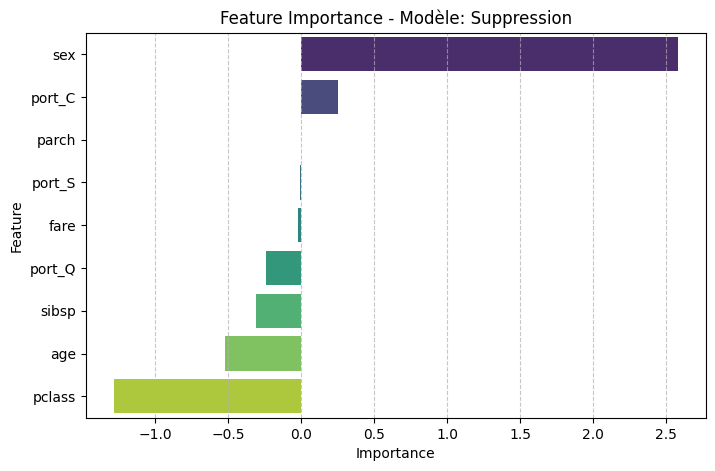

In [234]:
# Exemple d'appel
plot_feature_importance("Suppression")


C:\Users\anton\AppData\Local\Temp\ipykernel_32260\311580315.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


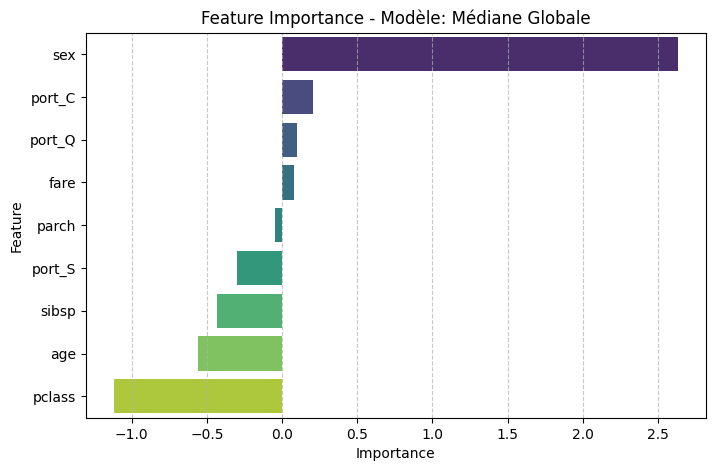

In [235]:
plot_feature_importance("Médiane Globale")

C:\Users\anton\AppData\Local\Temp\ipykernel_32260\311580315.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


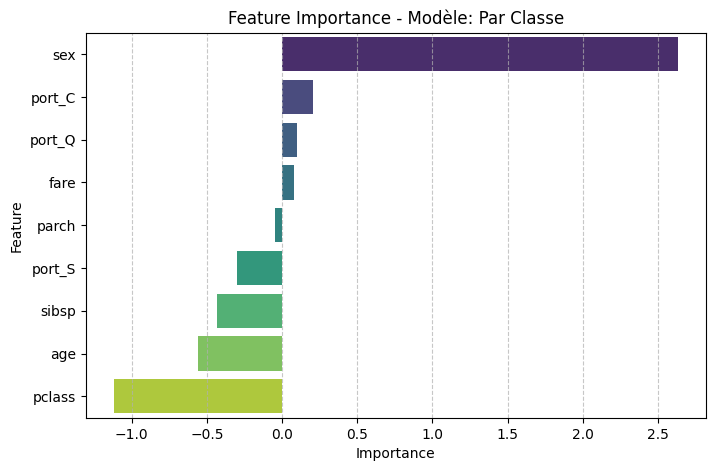

In [236]:
plot_feature_importance("Par Classe")

In [237]:
print(df_a.columns.tolist())
print(model.coef_[0])

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'port_C', 'port_Q', 'port_S']
[-1.11722182  2.62994926 -0.55992902 -0.43228213 -0.04346424  0.08297541
  0.20409868  0.10117511 -0.30204864]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 1. Tu définis ton modèle
model = LogisticRegression(max_iter=1000)

# 2. Tu calcules les scores (X_train doit être déjà nettoyé/encodé ici)
scores = cross_val_score(model, X_train, y_train, cv=5)

print(f"Précision moyenne : {scores.mean():.2%}")

# 3. Tu récupères le modèle en faisant un fit final
model.fit(X_train, y_train)

# Maintenant, ton objet 'model' est entraîné et prêt à l'emploi !

In [ ]:
from sklearn.model_selection import  GridSearchCV, StratifiedKFold

# Grille de paramètres
# On teste le nombre de composantes PCA ET la force de la régularisation
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}


# Configuration de la Cross-Validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=cv_strategy, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

print(f"\n--- RÉSULTATS ---")
print(f"Meilleurs paramètres : {grid.best_params_}")
print(f"Meilleur score CV : {grid.best_score_:.2%}")

# Évaluation sur le test set (données jamais vues)
y_pred = grid.predict(X_test)
final_acc = grid.score(X_test, y_test)

print(f"Accuracy finale sur Test : {final_acc:.2%}")


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

df = sns.load_dataset('titanic')

df_ = df.dropna(subset=["age","embarked"])
X = df_.drop(columns=["survived"])
y = df_.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Définir quelles colonnes subissent quel traitement
num_features = ["age", "fare", "sibsp", "parch"]
cat_features = ["embarked"]
passthrough_features = ["pclass"]
ordinal_features = ["sex"]
# 2. Créer le "préprocesseur" (le trieur à l'entrée du tunnel)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features), 
        ('pass', 'passthrough', passthrough_features),
        ('sex_map', OrdinalEncoder(), ordinal_features)
    ]
)

# 3. Créer le Pipeline final
pipe = Pipeline([
    ('prepro', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

# 4. Grille de paramètres (Attention aux doubles underscores !)
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2']
}

# 5. Lancer la GridSearch sur le Pipeline
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train) # Ici X_train contient les colonnes brutes (num + cat)

print(f"Meilleurs paramètres : {grid.best_params_}")
print(f"Score final : {grid.score(X_test, y_test):.2%}")

# PCA

In [241]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. Préparation des données (on reprend ton df du Titanic nettoyé)
X = df2.drop(columns=['survived'])
y = df2['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Standardisation (OBLIGATOIRE pour la PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # On utilise le scaler du train !

# 3. PCA à la main sur le TRAIN
n = X_train_scaled.shape[0]
cov_matrix = (X_train_scaled.T @ X_train_scaled) / (n - 1)
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix) # eigh est plus stable

# Tri des composantes par importance (décroissant)
idx = eigen_values.argsort()[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]

# On décide de garder K composantes (ex: 3 pour la démo)
k = 3
V_k = eigen_vectors[:, :k]

# 4. PROJECTION (Transformation)
# On projette le train ET le test sur les MÊMES vecteurs propres V_k
X_train_pca = X_train_scaled @ V_k
X_test_pca = X_test_scaled @ V_k

# 5. Entraînement de la Régression Logistique sur les composantes
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

# 6. Évaluation
score = model_pca.score(X_test_pca, y_test)
print(f"Précision avec {k} composantes PCA : {score:.2%}")

Précision avec 3 composantes PCA : 67.98%
